Veri Setinin İlk 5 Satırı:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2 

C:\Users\ozlem\AppData\Local\Temp\ipykernel_21724\192899473.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Bilinmiyor', inplace=True)


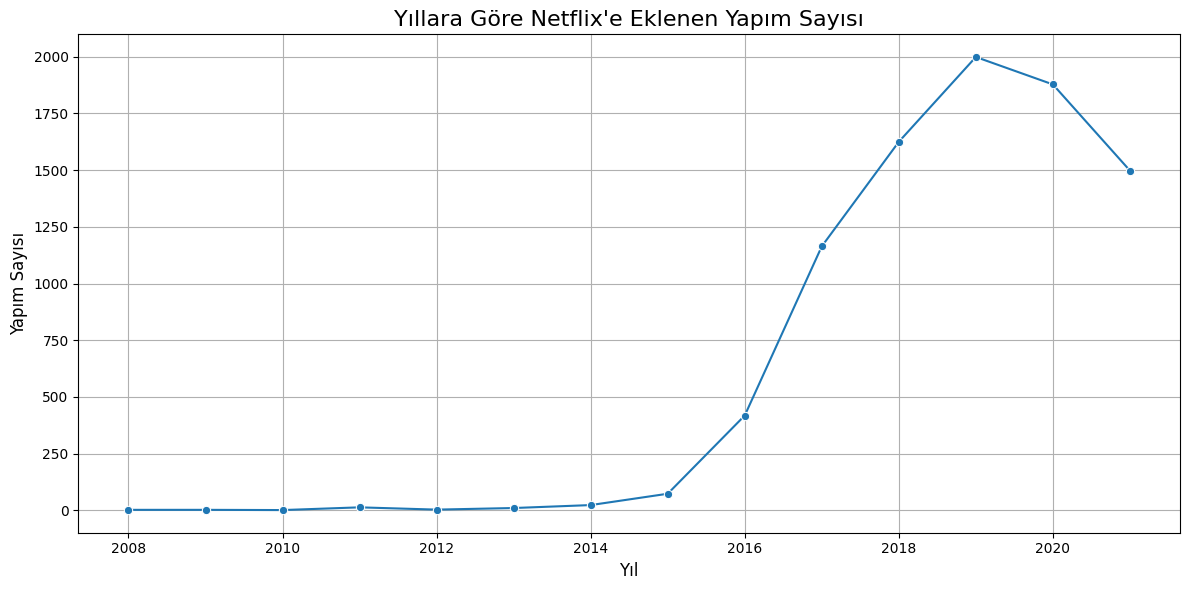

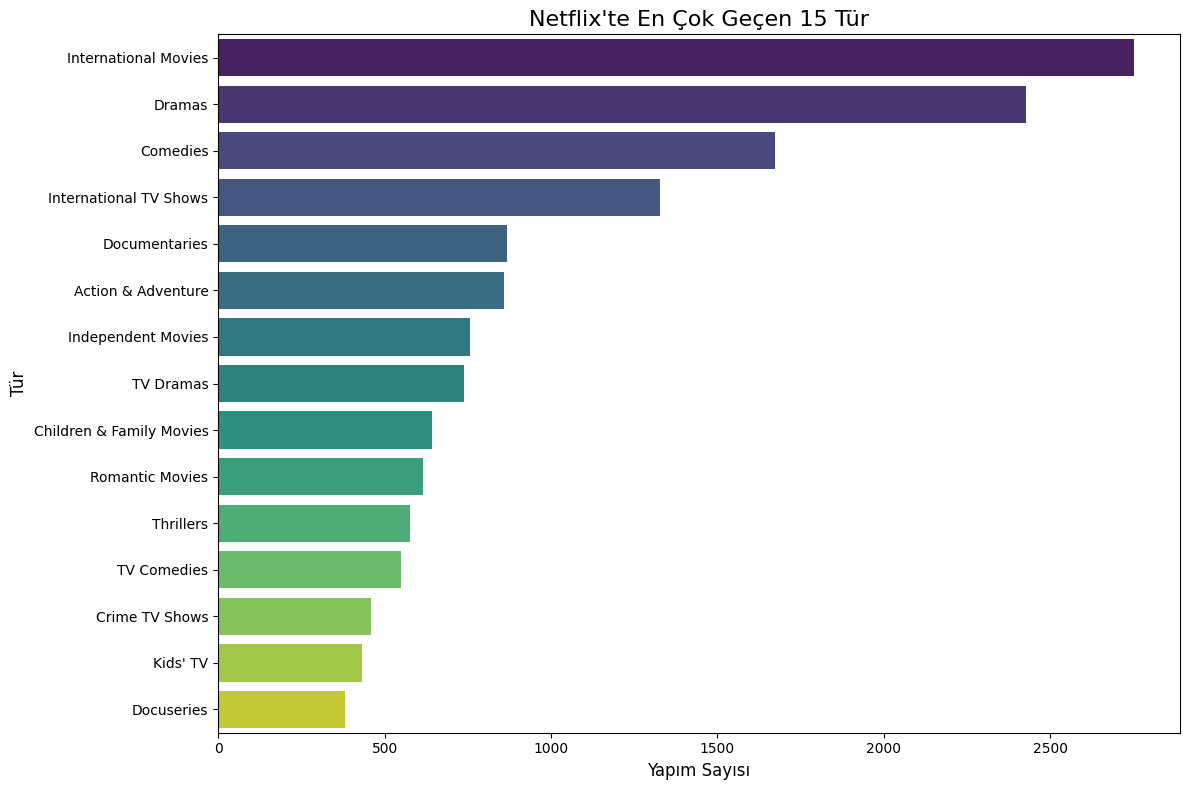

In [2]:
# 01_cleaning_and_eda.ipynb


import sys
sys.path.append('.')

# Gerekli kütüphaneleri ve kendi utils dosyanı içe aktar
import pandas as pd
from utils import parse_date_added, create_yearly_trend_chart, create_top_genres_chart
# ...

# Veri setini yükle
# netflix_titles.csv dosyasının data/ klasöründe olduğundan emin olun
df = pd.read_csv('../data/netflix_titles.csv')

# --- VERİ TEMİZLEME VE İLK GÖZLEMLER (EDA) ---

# Veriye ilk bakış
print("Veri Setinin İlk 5 Satırı:")
print(df.head())

print("\nVeri Setinin Bilgi Özeti:")
print(df.info())

# Eksik verileri doldurma
for col in ['director', 'cast', 'country']:
    df[col].fillna('Bilinmiyor', inplace=True)

# 'date_added' sütununu utils.py içindeki fonksiyonla düzenleme
df = parse_date_added(df)

# Eksik 'date_added' satırlarını temizleme
df.dropna(subset=['date_added'], inplace=True)

print("\nTemizlenmiş Veri Setinin Bilgi Özeti:")
print(df.info())

# --- GÖRSELLEŞTİRMELER VE ANALİZLER ---

# Yıllara Göre Eklenen Yapım Sayısı Grafiğini Oluştur ve Kaydet
create_yearly_trend_chart(df, output_path='images/yearly_trend.png')

# En Çok Geçen 15 Tür Grafiğini Oluştur ve Kaydet
create_top_genres_chart(df, output_path='../images/top_genres.png')

In [5]:
df.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
df.describe(include="all")


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


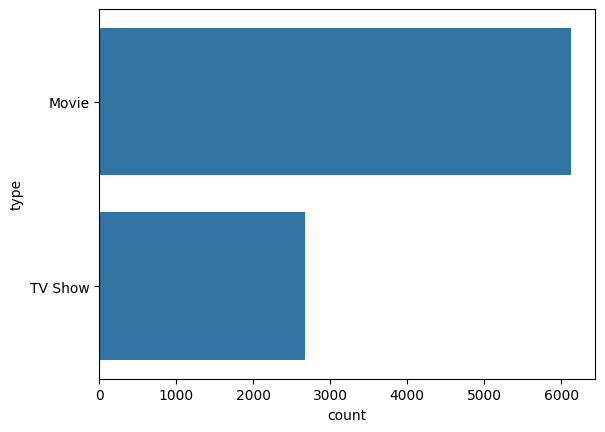

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y='type', data=df)
plt.show()


In [13]:
import pandas as pd

# Hepsini string yapıp boşlukları temizle
df['date_added'] = df['date_added'].astype(str).str.strip()

# 'nan' stringlerini NaN'a çevir
df['date_added'] = df['date_added'].replace('nan', pd.NA)

# Tarihe çevir
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Kontrol
print(df['date_added'].head())
print("Eksik tarih sayısı:", df['date_added'].isnull().sum())


0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-24
4   2021-09-24
Name: date_added, dtype: datetime64[ns]
Eksik tarih sayısı: 10


In [14]:
df['date_added'].head()
df['date_added'].isnull().sum()  # Kaç tane NaT var bak



np.int64(10)

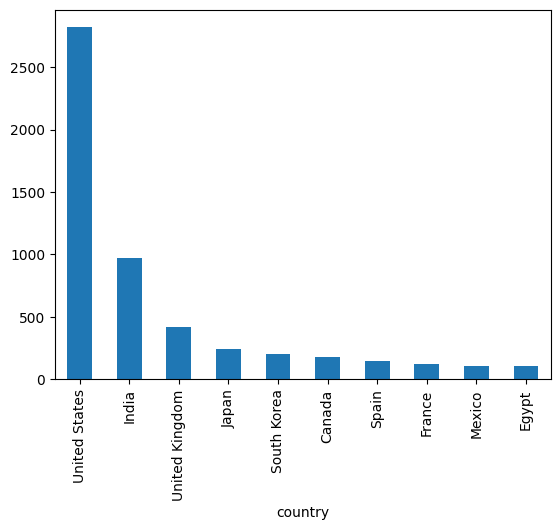

In [9]:
df['country'].value_counts().head(10).plot(kind='bar')
plt.show()


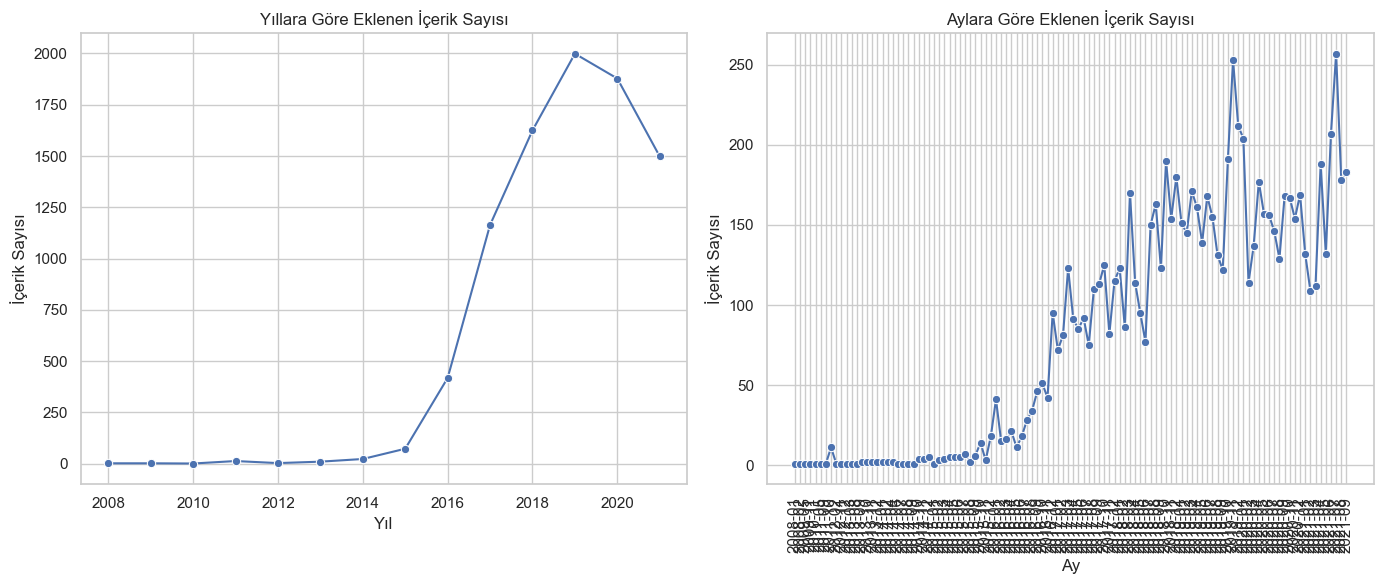

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ CSV yükle
df = pd.read_csv(r"C:\Users\ozlem\OneDrive\Masaüstü\netflix-analysis\data\netflix_titles.csv")

# 2️⃣ Tarih sütununu datetime formatına çevir
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# 3️⃣ Eksik tarih verilerini at
df = df.dropna(subset=['date_added'])

# 4️⃣ Yıla göre sayım yap
df['year_added'] = df['date_added'].dt.year
year_counts = df['year_added'].value_counts().sort_index()

# 5️⃣ Ay bazında sayım yap
df['month_added'] = df['date_added'].dt.to_period('M')
month_counts = df['month_added'].value_counts().sort_index()

# 6️⃣ Grafik boyutu ve tema
plt.figure(figsize=(14,6))
sns.set_theme(style="whitegrid")

# Yıl bazlı grafik
plt.subplot(1,2,1)
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o')
plt.title("Yıllara Göre Eklenen İçerik Sayısı")
plt.xlabel("Yıl")
plt.ylabel("İçerik Sayısı")

# Ay bazlı grafik
plt.subplot(1,2,2)
sns.lineplot(x=month_counts.index.astype(str), y=month_counts.values, marker='o')
plt.xticks(rotation=90)
plt.title("Aylara Göre Eklenen İçerik Sayısı")
plt.xlabel("Ay")
plt.ylabel("İçerik Sayısı")

plt.tight_layout()
plt.show()



In [18]:
print(f"Toplam satır sayısı: {len(df)}")
print(f"Toplam sütun sayısı: {df.shape[1]}")


Toplam satır sayısı: 8709
Toplam sütun sayısı: 14


In [4]:
# Veri temizleme ve EDA kodlarından sonra bu hücreyi ekle

# Veriyi kaydetmeden önce gereksiz sütunları kaldırabilirsiniz (isteğe bağlı)
df_clean = df.drop(columns=['Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15'], errors='ignore')

# data/processed klasörünün varlığını kontrol et ve oluştur
import os
processed_dir = 'data/processed'
if not os.path.exists(processed_dir):
    os.makedirs(processed_dir)

# Temizlenmiş veriyi CSV dosyası olarak kaydet
df_clean.to_csv(os.path.join(processed_dir, 'netflix_clean.csv'), index=False)

print(f"Temizlenmiş veri '{processed_dir}/netflix_clean.csv' olarak kaydedildi.")

Temizlenmiş veri 'data/processed/netflix_clean.csv' olarak kaydedildi.
